In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [81]:
file_path = "heart_attack_prediction_dataset.csv"
df = pd.read_csv(file_path)

In [20]:
def calculate_statistics(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = feature[(feature < lower_bound) | (feature > upper_bound)]

    return {
        'Type': str(feature.dtype),
        'Range of Values': feature.max() - feature.min(),
        'Min': feature.min(),
        'Max': feature.max(),
        'Mean': feature.mean(),
        'Mode': feature.mode().iloc[0], # first item of possible multi modes
        'Median': feature.median(),
        'Outlier': outliers.tolist(),
    }

statistics_df = pd.DataFrame(columns=['Feature', 'Type', 'Range of Values', 'Min', 'Max', 'Mean', 'Mode', 'Median', 'Outlier'])

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        statistics = calculate_statistics(df[column])
        statistics_df.loc[len(statistics_df)] = [column, *statistics.values()]

for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column]):
        # For other columns, only calculate mode and type
        mode_value = df[column].mode().iloc[0]
        statistics_df.loc[len(statistics_df)] = [column, str(df[column].dtype), None, None, None, None, mode_value, None, None]
        

# Display the resulting dataframe
statistics_df

,Feature,Type,Range of Values,Min,Max,Mean,Mode,Median,Outlier
0,Age,int64,72.000000,18.000000,90.000000,53.707977,90.0,54.000000,[]
1,Cholesterol,int64,280.000000,120.000000,400.000000,259.877211,235.0,259.000000,[]
2,Heart Rate,int64,70.000000,40.000000,110.000000,75.021682,94.0,75.000000,[]
3,Diabetes,int64,1.000000,0.000000,1.000000,0.652288,1.0,1.000000,[]
4,Family History,int64,1.000000,0.000000,1.000000,0.492982,0.0,0.000000,[]
5,Smoking,int64,1.000000,0.000000,1.000000,0.896839,1.0,1.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,Obesity,int64,1.000000,0.000000,1.000000,0.501426,1.0,1.000000,[]
7,Alcohol Consumption,int64,1.000000,0.000000,1.000000,0.598083,1.0,1.000000,[]
8,Exercise Hours Per Week,float64,19.996267,0.002442,19.998709,10.014284,0.002442,10.069559,[]
9,Previous Heart Problems,int64,1.000000,0.000000,1.000000,0.495835,0.0,0.000000,[]


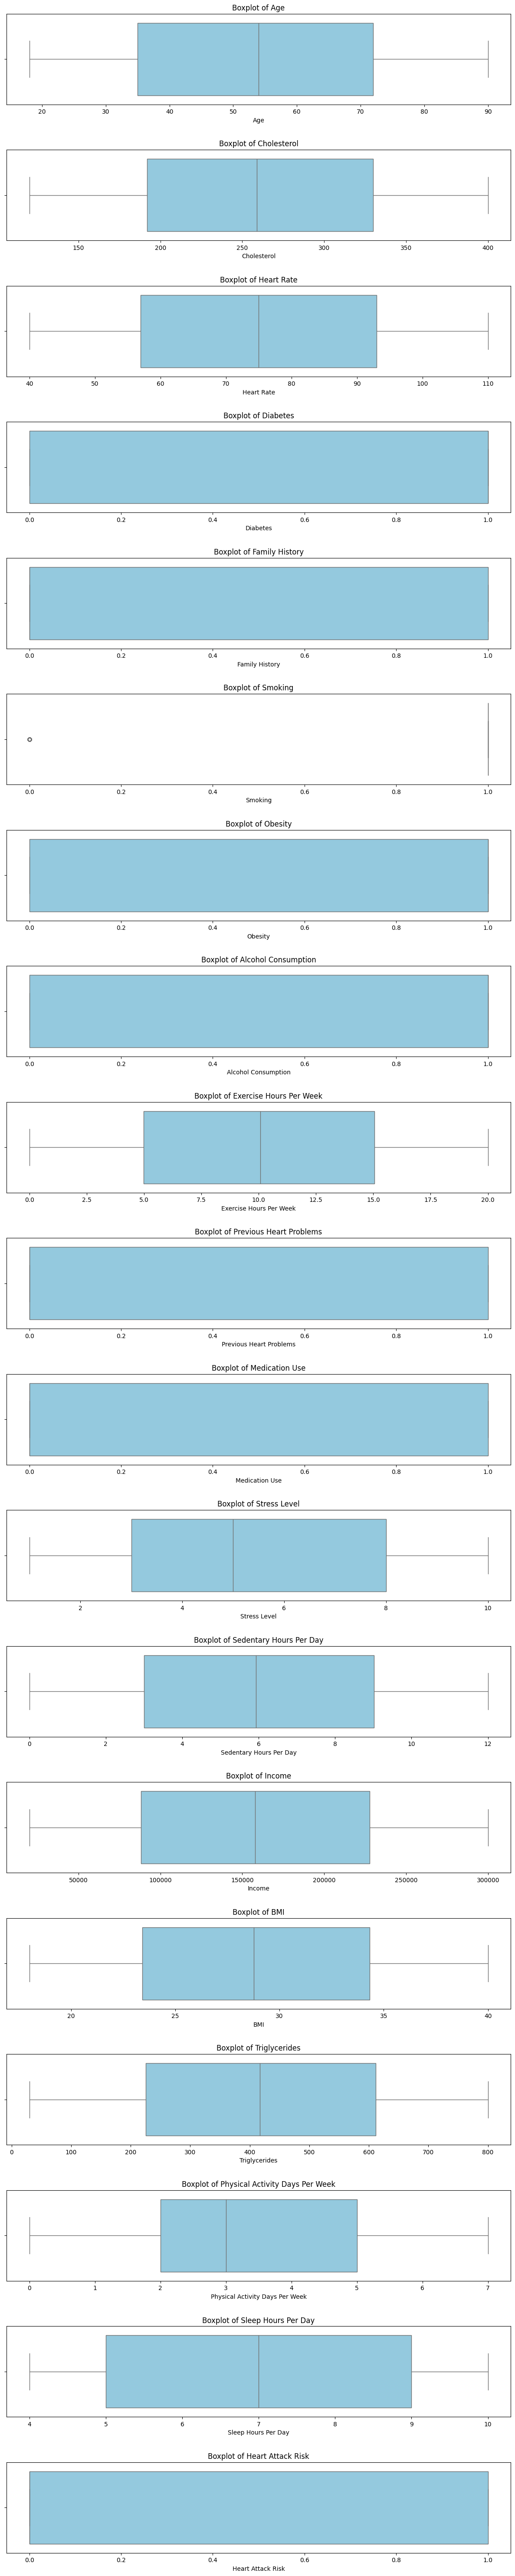

In [19]:
# we will show boxplot for each numeric feature
numeric_columns = df.select_dtypes(include='number').columns

fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(15, 4 * len(numeric_columns)))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numeric_columns):
    sns.boxplot(ax=axes[i], x=df[column], color='skyblue')
    axes[i].set_title(f'Boxplot of {column}')

plt.show()

## We can suggest some dependencies according to the information stated in the introduction of the dataset.####  In the following sectiosn, a number of relationships are specified along with their analysis andreviewe

* ### Obesity and Heart Attack Risk

#### Since Obesity has a harmful effect on the heart, it can be said that people who are fat have a higher chance of developing heart disease

In [72]:
print('The percentage of people with heart disease is equal to:')
df['Heart Attack Risk'].value_counts()[1] / df.shape[0] * 100

The percentage of people with heart disease is equal to:


35.82106584503024

In [106]:
healty_Obesity = df.loc[df['Obesity'] == 1]['Heart Attack Risk'].value_counts()[0]
patient_Obesity = df.loc[df['Obesity'] == 1]['Heart Attack Risk'].value_counts()[1]
(healty_Obesity / (healty_Obesity + patient_Obesity)) * 100

64.815657715066

#### So as you can see, we have had a 29% increase in the percentage of people with heart attacks, which is probably due to obesity.

* ### Japanese and Physical Activity Days Per Week

#### A fun fact about japanese, is that they have more activity rather than other people in the world!

In [140]:
print('The percentage of people with Physical Activity Days Per Week more that 3 days is equal to:')
df.loc[df['Physical Activity Days Per Week'] >= 4].shape[0] / df.shape[0] * 100

The percentage of people with Physical Activity Days Per Week more that 3 days is equal to:


49.35524363802351

In [141]:
japanese = df.loc[df['Country'] == 'Japan']
japanese_actives = japanese.loc[japanese['Physical Activity Days Per Week'] >= 4].shape[0]
(japanese_actives / japanese.shape[0]) * 100


51.27020785219399

#### So as you can see, we have had a 2% increase in the percentage of japanese people with more activities! Although thats a few change, b